# Project Summary

In [47]:
from game import Game, Player
from investigate_game import InvestigateGame
from random_player import RandomPlayer
from min_max import MinMaxPlayer, AlphaBetaMinMaxPlayer
from q_learning import QLearningRLPlayer
from monte_carlo_rl import MonteCarloRLPlayer
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm, trange

In [ ]:
def plot_training_stats(rewards: list, step_size: int, switch_ratio: int | None = None) -> None:
    """
    Given a training list of rewards, this function plots the averages of the rewards
    using a given step size.

    Args:
        rewards: the rewards achieved during training time;
        step: the step size to be used to plot an average value;
        switch_ratio: define the moment in which minmax started playing-

    Returns:
        None.
    """

    # https://stackoverflow.com/questions/15956309/averaging-over-every-n-elements-of-a-numpy-array
    # compute the averages
    averages = np.mean(np.array(rewards).reshape(-1, step_size), axis=1)

    # define the width and height of the figure in inches
    plt.figure(figsize=(10, 5))
    # plot the averages
    plt.plot(averages, color='red', marker='o', linestyle='dashed', label='Training')
    # if minmax played
    if switch_ratio is not None:
        # compute the exact moment
        switch_moment = int(len(rewards) / step_size * switch_ratio)
        # print a vertical line at the moment minmax started playing
        plt.axvline(x=switch_moment, color='green', label='MinMax Starts Playing')
    # specify the title
    plt.title('Training Summary')
    # specify the x-axis label
    plt.xlabel('# of the step')
    # specify the y-axis label
    plt.ylabel('Mean rewards value')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

## Train a Q-learning player

In [ ]:
# create the Q-learning player
q_learning_rl_agent = QLearningRLPlayer(minmax=True)
# train the Q-learning player
q_learning_rl_agent.train(max_steps_draw=10)
# print the number of explored states
print(f'Number of explored states: {len(q_learning_rl_agent._q_table.keys())}')
# serialize the Q-learning player
q_learning_rl_agent.save('agents/q_learning_agent_1.pkl')

In [ ]:
# get the rewards
rewards = q_learning_rl_agent.rewards
# plot the averages of the training rewards
plot_training_stats(rewards, step_size=5, switch_ratio=0.8)

## Train a Monte Carlo learning player

In [ ]:
monte_carlo_rl_agent = MonteCarloRLPlayer()
monte_carlo_rl_agent.train(max_steps_draw=10)
monte_carlo_rl_agent.save('agents/monte_carlo_rl_no_sim.pkl')

In [ ]:
# serialize the Q-learning player
monte_carlo_rl_agent.save('agents/monte_carlo_rl_agent_3.pkl')

In [ ]:
# create the Q-learning player
monte_carlo_rl_agent = MonteCarloRLPlayer(minmax=True)
# train the Q-learning player
monte_carlo_rl_agent.train(max_steps_draw=10)
# print the number of explored states
print(f'Number of explored states: {(len(monte_carlo_rl_agent._q_table.keys())):,}')
# serialize the Q-learning player
monte_carlo_rl_agent.save('agents/monte_carlo_rl_agent_1.pkl')

In [ ]:
# load trained Montecalrlo agent
# monte_carlo_rl_agent = MonteCarloRLPlayer()
# monte_carlo_rl_agent.load('agents/monte_carlo_rl_no_sim.pkl')
# get the rewards

rewards = monte_carlo_rl_agent.rewards

# plot the averages of the training rewards

plot_training_stats(rewards, step_size=200)

#### Continuing the training of Montecarlo RL Player

In [ ]:
# load trained Montecalrlo agent
monte_carlo_rl_agent = MonteCarloRLPlayer()
monte_carlo_rl_agent.load('agents/monte_carlo_rl_agent_1.pkl')
# resume training of Montecarlo player
monte_carlo_rl_agent.train(max_steps_draw=10)
# print the number of explored states
print(f'Number of explored states: {(len(monte_carlo_rl_agent._q_table.keys())):,}')
# serialize the Q-learning player
monte_carlo_rl_agent.save('agents/monte_carlo_rl_agent_1.pkl')

In [ ]:
# load trained Montecalrlo agent
monte_carlo_rl_agent = MonteCarloRLPlayer()
monte_carlo_rl_agent.load('agents/monte_carlo_rl_agent_1.pkl')
monte_carlo_rl_agent._exploration_decay_rate = 2e-5
# resume training of Montecarlo player
monte_carlo_rl_agent.train(max_steps_draw=10)
# print the number of explored states
print(f'Number of explored states: {(len(monte_carlo_rl_agent._q_table.keys())):,}')
# serialize the Q-learning player
monte_carlo_rl_agent.save('agents/monte_carlo_rl_agent_1.pkl')

In [ ]:
# get the rewards
rewards = monte_carlo_rl_agent.rewards
# plot the averages of the training rewards
plot_training_stats(rewards, step_size=2000)

## Train MinMax

In [ ]:
minmax_player_0 = MinMaxPlayer(0, depth=3, symmetries=True)
rand_player = RandomPlayer()
pbar = tqdm(range(10))
for i in pbar:
    g = Game()
    _ = g.play(minmax_player_0, rand_player)
    pbar.set_description(
        f'Hash tables entries: {(len(minmax_player_0._visited_max_states) + len(minmax_player_0._visited_min_states)):,}'
    )
print(
    f'Entry in the Hash tables minmax_player_0: {(len(minmax_player_0._visited_max_states) + len(minmax_player_0._visited_min_states)):,}'
)
minmax_player_0.save('agents/minmax_player0_depth3_agent1')

In [ ]:
minmax_player_1 = MinMaxPlayer(1, depth=3, symmetries=True)
rand_player = RandomPlayer()
pbar = tqdm(range(10))
for i in pbar:
    g = Game()
    _ = g.play(rand_player, minmax_player_1)
    pbar.set_description(
        f'Hash tables entries: {(len(minmax_player_1._visited_max_states) + len(minmax_player_1._visited_min_states)):,}'
    )
print(
    f'Entry in the Hash tables minmax_player_1: {(len(minmax_player_1._visited_max_states) + len(minmax_player_1._visited_min_states)):,}'
)
minmax_player_1.save('agents/minmax_player1_depth3_agent1')

## Train AlphaBetaMinMax

In [ ]:
alphabeta_player_0 = MinMaxPlayer(0, depth=3, symmetries=True)
rand_player = RandomPlayer()
pbar = tqdm(range(10))
for i in pbar:
    g = Game()
    _ = g.play(alphabeta_player_0, rand_player)
    pbar.set_description(
        f'Hash tables entries: {(len(alphabeta_player_0._visited_max_states) + len(alphabeta_player_0._visited_min_states)):,}'
    )
print(
    f'Entry in the Hash tables alphabeta_player_0: {(len(alphabeta_player_0._visited_max_states) + len(alphabeta_player_0._visited_min_states)):,}'
)
alphabeta_player_0.save('agents/alphabeta_player0_depth3_agent1')

In [ ]:
alphabeta_player_1 = MinMaxPlayer(1, depth=3, symmetries=True)
rand_player = RandomPlayer()
pbar = tqdm(range(10))
for i in pbar:
    g = Game()
    _ = g.play(rand_player, alphabeta_player_1)
    pbar.set_description(
        f'Hash tables entries: {(len(alphabeta_player_1._visited_max_states) + len(alphabeta_player_1._visited_min_states)):,}'
    )
print(
    f'Entry in the Hash tables alphabeta_player_1: {(len(alphabeta_player_1._visited_max_states) + len(alphabeta_player_1._visited_min_states)):,}'
)
alphabeta_player_1.save('agents/alphabeta_player1_depth3_agent1')

## Play Games

In [ ]:
monte_carlo_rl_agent = MonteCarloRLPlayer()
monte_carlo_rl_agent.load('agents/monte_carlo_rl_agent_1.pkl')
minmax_player_1 = MinMaxPlayer(1)
minmax_player_1.load('agents/minmax_player1_agent1')

In [ ]:
# create the first player
player1 = monte_carlo_rl_agent
# create the second player
player2 = RandomPlayer()
# create a new game
game = InvestigateGame(Game())
# LET'S BATTLE
winner = game.play(player1, player2, max_steps_draw=10)

## Testing Players performance

In [163]:
def show_game_statistics(player1: Player, player2: Player, n_games: int) -> None:
    """
    Play a few games between two players and plot the calculated winning percentages.

    Args:
        players1: the first player;
        players2: the second player;
        n_games: how many games to play.

    Returns:
        None.
    """

    # define the width and height of the figure in inches
    plt.figure(figsize=(8, 5))

    # let the players play both first and second
    for plot, (player1, player2) in enumerate([(player1, player2), (player2, player1)]):
        # count how many wins for the first player
        player1_wins = 0

        # for each game
        for _ in range(n_games):
            # create the game
            game = Game()
            # play the game
            winner = game.play(player1, player2)
            # if the first player wins
            if winner == 0:
                # increment the counter
                player1_wins += 1

        # create a subplot
        plt.subplot(1, 2, plot + 1)
        # plot the first player wins
        bars = plt.bar([0, 0.6], [player1_wins, n_games - player1_wins], color=['royalblue', 'lightcoral'], width=0.4)
        # for each bar
        for bar in bars:
            # get the winning percentage
            percentage = bar.get_height() / n_games
            # write the percentage on top of the bar
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height(),
                f'{percentage:.2%}',
                ha='center',
                va='bottom',
                fontsize='medium',
            )
        # plot the players' names
        plt.xticks([0, 0.6], [player1.__class__.__name__, player2.__class__.__name__])
        # delete y-axis ticks and labels
        plt.tick_params(left=False, labelleft=False)
        # specify the y-axis label
        plt.ylabel('Wins')
        # specify the title shared between the subplots
        plt.title(f'{player1.__class__.__name__} VS {player2.__class__.__name__}')

    # specify the title shared between the subplots
    plt.suptitle(f'Summary of {n_games} games')

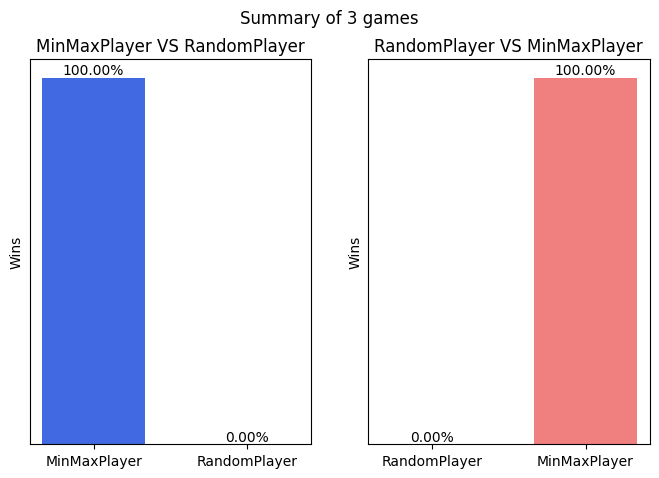

In [164]:
show_game_statistics(MinMaxPlayer(depth=1), RandomPlayer(), 3)

### Vs Random Player

In [ ]:
random_player = RandomPlayer()
# load trained Montecalrlo agent
''' 
print(f'Minmax as first')
test(minmax_player_0,random_player,100)
print(f'Minmax as second')
test(random_player,minmax_player_1,100)
print(f'Alphabeta as first')
test(alphabeta_player_0,random_player,100)
print(f'Alphabeta as second')
test(random_player,alphabeta_player_1,100)
'''

print(f'Montecarlo as first')
test(monte_carlo_rl_agent, random_player, 1_000, 0)
print(f'Montecarlo as second')
test(random_player, monte_carlo_rl_agent, 1_000, 1)

In [ ]:
print(f'MinMax as first')
test(MinMaxPlayer(0, depth=3), RandomPlayer(), 1_00, 0)
print(f'MinMax as second')
test(RandomPlayer(), MinMaxPlayer(1, depth=3), 1_00, 1)

In [ ]:
print(f'MinMax as first with symmetries')
test(MinMaxPlayer(0, depth=3, symmetries=True), RandomPlayer(), 1_00, 0)
print(f'MinMax as second with symmetries')
test(RandomPlayer(), MinMaxPlayer(1, depth=3, symmetries=True), 1_00, 1)

In [ ]:
print(f'AlphaBetaMinMax as first')
test(AlphaBetaMinMaxPlayer(0, depth=3), RandomPlayer(), 1_00, 0)
print(f'AlphaBetaMinMax as second')
test(RandomPlayer(), AlphaBetaMinMaxPlayer(1, depth=3), 1_00, 1)

In [ ]:
print(f'Montecarlo as first')
test(AlphaBetaMinMaxPlayer(0, depth=3, symmetries=True), RandomPlayer(), 1_00, 0)
print(f'Montecarlo as second')
test(RandomPlayer(), AlphaBetaMinMaxPlayer(1, depth=3, symmetries=True), 1_00, 1)

### Minmax vs Montecarlo

In [ ]:
print(f'Montecarlo as first')
test(monte_carlo_rl_agent, MinMaxPlayer(1, depth=2), 50, 0)